<a href="https://colab.research.google.com/github/MaxMin00/Stockmarket_Prophet/blob/main/Stockmarket_Prediction_Masterpiece.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# Open csv file

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Kaggle API
!pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d dgawlik/nyse
! mkdir nyse
! unzip nyse.zip -d nyse

 85% 26.0M/30.7M [00:00<00:00, 61.4MB/s]
100% 30.7M/30.7M [00:00<00:00, 73.6MB/s]
Archive:  nyse.zip
  inflating: nyse/fundamentals.csv   
  inflating: nyse/prices-split-adjusted.csv  
  inflating: nyse/prices.csv         
  inflating: nyse/securities.csv     


In [6]:
df = pd.read_csv('/content/nyse/prices.csv')
# main data set from kaggle

In [7]:
df1 = pd.read_csv('/content/drive/MyDrive/Amazon Stock Price/NASDAQ Composite Historical Data.csv')
df1['Price'] = df1['Price'].str.replace(',','').astype('float64')
# NASDAQ indicator
df2 = pd.read_csv('/content/drive/MyDrive/Amazon Stock Price/US Dollar Index Futures Historical Data.csv')
# USD Index

# check raw data

In [8]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [9]:
df1.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec 30, 2016",5383.12,"5,440.17","5,441.90","5,371.89",395.59M,-0.90%
1,"Dec 29, 2016",5432.09,"5,437.51","5,450.63","5,415.18",289.60M,-0.12%
2,"Dec 28, 2016",5438.56,"5,497.44","5,498.91","5,434.70",294.74M,-0.89%
3,"Dec 27, 2016",5487.44,"5,470.76","5,512.37","5,469.61",269.42M,0.45%
4,"Dec 23, 2016",5462.69,"5,441.76","5,462.69","5,441.76",264.11M,0.28%


In [10]:
df2.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec 30, 2016",102.286,102.240,102.630,101.95,38.08K,-0.41%
1,"Dec 29, 2016",102.711,103.195,103.210,102.65,31.94K,-0.52%
2,"Dec 28, 2016",103.244,102.980,103.575,102.86,19.85K,0.23%
3,"Dec 27, 2016",103.007,103.055,103.140,102.97,8.16K,0.00%
4,"Dec 23, 2016",103.002,103.095,103.205,102.86,11.98K,-0.09%


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1762 non-null   object 
 1   Price     1762 non-null   float64
 2   Open      1762 non-null   object 
 3   High      1762 non-null   object 
 4   Low       1762 non-null   object 
 5   Vol.      1762 non-null   object 
 6   Change %  1762 non-null   object 
dtypes: float64(1), object(6)
memory usage: 96.5+ KB


In [13]:
df2.info()
# there are more data than the NASDAQ datas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1814 entries, 0 to 1813
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1814 non-null   object 
 1   Price     1814 non-null   float64
 2   Open      1814 non-null   float64
 3   High      1814 non-null   float64
 4   Low       1814 non-null   float64
 5   Vol.      1814 non-null   object 
 6   Change %  1814 non-null   object 
dtypes: float64(4), object(3)
memory usage: 99.3+ KB


In [14]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [15]:
df.shape

(851264, 7)

In [16]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


# Extract Amazon stock data

In [17]:
df['symbol'].value_counts().loc['AAPL']

1762

In [18]:
gpA = df.groupby(['symbol']).get_group('AMZN')
amazon_df = pd.DataFrame(gpA).reset_index().drop('index' , axis =1).set_index('date')

In [19]:
amazon_df.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,AMZN,136.250000,133.899994,133.139999,136.610001,7599900.0
2010-01-05,AMZN,133.429993,134.690002,131.809998,135.479996,8851900.0
2010-01-06,AMZN,134.600006,132.250000,131.649994,134.729996,7178800.0
2010-01-07,AMZN,132.009995,130.000000,128.800003,132.320007,11030200.0
2010-01-08,AMZN,130.559998,133.520004,129.029999,133.679993,9830500.0


In [20]:
amazon_df.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,337.875664,337.899058,333.969688,341.464438,4.607596e+06
std,189.294231,189.109339,187.654696,190.525796,3.091557e+06
min,105.930000,108.610001,105.800003,111.290001,9.844000e+05
25%,192.962494,193.377506,190.284997,195.532501,2.741550e+06
50%,282.500000,282.915008,279.869995,285.074997,3.890700e+06
75%,398.425003,398.014999,393.799988,402.082496,5.384450e+06
max,845.789978,844.359985,840.599976,847.210022,4.242110e+07


# Merge Data sets

In [21]:
print(df1.columns)

df1 = df1.reset_index().drop('index' , axis =1).set_index('Date')
# reset the index to Date
df1 = df1['Price']
# number of samples is the same as amazon since amazon stock is part of NASDAQ
df1.name = "NASDAQ"

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


In [22]:
print(df1.values.dtype)
# astype('float64')

float64


In [23]:
amazon_df.index=pd.to_datetime(amazon_df.index)
amazon_df.index.dtype

dtype('<M8[ns]')

In [24]:
df1.index = pd.to_datetime(df1.index)
df1.index.dtype

dtype('<M8[ns]')

In [25]:
print(df2.columns)
df2 = df2.reset_index().drop('index' , axis =1).set_index('Date')
# reset the index to Date
df2 = df2['Price']

df2.name = "dollar_index"
# the dates are different since 

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


In [26]:
df2.index = pd.to_datetime(df2.index)
df2.index.dtype

dtype('<M8[ns]')

In [27]:
amazon_df = pd.merge(amazon_df,df1, left_index = True, right_index = True, how = 'outer')
# merge amazon_df and df1(NASDAQ)

In [28]:
amazon_df = amazon_df.join(df2)

In [29]:
amazon_df.drop('symbol', axis =1, inplace = True)

In [30]:
amazon_df

,open,close,low,high,volume,NASDAQ,dollar_index
2010-01-04,136.250000,133.899994,133.139999,136.610001,7599900.0,2308.42,77.830
2010-01-05,133.429993,134.690002,131.809998,135.479996,8851900.0,2308.71,77.850
2010-01-06,134.600006,132.250000,131.649994,134.729996,7178800.0,2301.09,77.655
2010-01-07,132.009995,130.000000,128.800003,132.320007,11030200.0,2300.05,78.105
2010-01-08,130.559998,133.520004,129.029999,133.679993,9830500.0,2317.17,77.655
...,...,...,...,...,...,...,...
2016-12-23,764.549988,760.590027,757.989990,766.500000,1976900.0,5462.69,103.002
2016-12-27,763.400024,771.400024,761.200012,774.650024,2627400.0,5487.44,103.007
2016-12-28,776.250000,772.130005,770.500000,780.000000,3279100.0,5438.56,103.244
2016-12-29,772.400024,765.150024,760.849976,773.400024,3153500.0,5432.09,102.711


# EDA

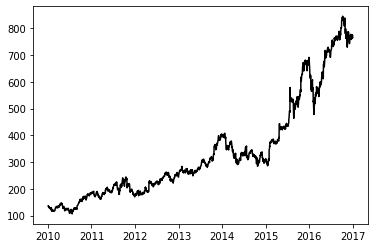

In [31]:
plt.plot(amazon_df['open'],'k-', label ='Default')

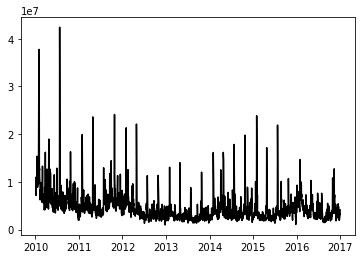

In [32]:
plt.plot(amazon_df['volume'],'k-', label ='Default')

Text(0, 0.5, 'price ($)')

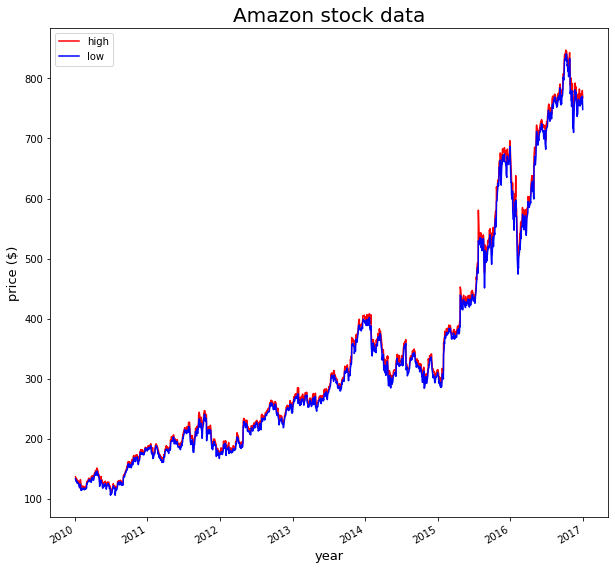

In [33]:
fig = plt.figure(figsize=(10,10))
ax1 = fig. add_subplot(1,1,1)

high = amazon_df['high']
low = amazon_df['low']
high.plot(ax = ax1, style='r-')
low.plot(ax = ax1, style = 'b-')
plt.legend()
#ax1.set_xlim(['2010-01-04','2010-12-31'])
#ax1.set_ylim([100,200])
plt.title('Amazon stock data', fontsize = 20)
plt.xlabel('year', fontsize = 13)
plt.ylabel('price ($)',fontsize = 13) 

# Feature Engineering


In [34]:
import seaborn as sns

In [35]:
# Transaction amount in price
amazon_df['transaction_price']=((amazon_df['open']+amazon_df['close'])/2)*amazon_df['volume']
amazon_df['high_low'] = (amazon_df['high'] - amazon_df['low'])

In [36]:
amazon_df

,open,close,low,high,volume,NASDAQ,dollar_index,transaction_price,high_low
2010-01-04,136.250000,133.899994,133.139999,136.610001,7599900.0,2308.42,77.830,1.026556e+09,3.470002
2010-01-05,133.429993,134.690002,131.809998,135.479996,8851900.0,2308.71,77.850,1.186686e+09,3.669998
2010-01-06,134.600006,132.250000,131.649994,134.729996,7178800.0,2301.09,77.655,9.578314e+08,3.080002
2010-01-07,132.009995,130.000000,128.800003,132.320007,11030200.0,2300.05,78.105,1.445011e+09,3.520004
2010-01-08,130.559998,133.520004,129.029999,133.679993,9830500.0,2317.17,77.655,1.298019e+09,4.649994
...,...,...,...,...,...,...,...,...,...
2016-12-23,764.549988,760.590027,757.989990,766.500000,1976900.0,5462.69,103.002,1.507525e+09,8.510010
2016-12-27,763.400024,771.400024,761.200012,774.650024,2627400.0,5487.44,103.007,2.016267e+09,13.450012
2016-12-28,776.250000,772.130005,770.500000,780.000000,3279100.0,5438.56,103.244,2.538646e+09,9.500000
2016-12-29,772.400024,765.150024,760.849976,773.400024,3153500.0,5432.09,102.711,2.424332e+09,12.550048


# Train_Test_Val split

In [37]:
target = amazon_df['close']
input = amazon_df.drop('close', axis = 1)

from sklearn.model_selection import train_test_split
train_input,test_input, train_target, test_target = train_test_split(
    input,target, test_size=0.2, shuffle=False, random_state=1)

train_input_tune, val_input, train_target_tune, val_target = train_test_split(
    train_input,train_target,test_size = 0.2, shuffle =False, random_state=2)

In [38]:
train_input

,open,low,high,volume,NASDAQ,dollar_index,transaction_price,high_low
2010-01-04,136.250000,133.139999,136.610001,7599900.0,2308.42,77.830,1.026556e+09,3.470002
2010-01-05,133.429993,131.809998,135.479996,8851900.0,2308.71,77.850,1.186686e+09,3.669998
2010-01-06,134.600006,131.649994,134.729996,7178800.0,2301.09,77.655,9.578314e+08,3.080002
2010-01-07,132.009995,128.800003,132.320007,11030200.0,2300.05,78.105,1.445011e+09,3.520004
2010-01-08,130.559998,129.029999,133.679993,9830500.0,2317.17,77.655,1.298019e+09,4.649994
...,...,...,...,...,...,...,...,...
2015-08-03,537.450012,529.359985,540.440002,3014200.0,5115.38,97.616,1.616335e+09,11.080017
2015-08-04,529.690002,529.159973,536.950012,2934600.0,5105.55,98.024,1.557671e+09,7.790039
2015-08-05,538.799988,534.119995,539.140015,2889400.0,5139.94,98.035,1.554223e+09,5.020020
2015-08-06,539.299988,527.520020,542.739990,3820500.0,5056.44,97.906,2.041599e+09,15.219970


In [39]:
test_input

,open,low,high,volume,NASDAQ,dollar_index,transaction_price,high_low
2015-08-10,528.520020,523.000000,532.280029,2615900.0,5101.80,97.202,1.376644e+09,9.280029
2015-08-11,523.650024,522.000000,528.979980,2676600.0,5036.79,97.335,1.406701e+09,6.979980
2015-08-12,523.750000,513.059998,527.500000,3962300.0,5044.39,96.295,2.079534e+09,14.440002
2015-08-13,527.369995,525.489990,534.659973,2895200.0,5033.56,96.461,1.530157e+09,9.169983
2015-08-14,528.250000,528.250000,534.109985,1994800.0,5048.23,96.533,1.057015e+09,5.859985
...,...,...,...,...,...,...,...,...
2016-12-23,764.549988,757.989990,766.500000,1976900.0,5462.69,103.002,1.507525e+09,8.510010
2016-12-27,763.400024,761.200012,774.650024,2627400.0,5487.44,103.007,2.016267e+09,13.450012
2016-12-28,776.250000,770.500000,780.000000,3279100.0,5438.56,103.244,2.538646e+09,9.500000
2016-12-29,772.400024,760.849976,773.400024,3153500.0,5432.09,102.711,2.424332e+09,12.550048


In [40]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   open               1762 non-null   float64
 1   close              1762 non-null   float64
 2   low                1762 non-null   float64
 3   high               1762 non-null   float64
 4   volume             1762 non-null   float64
 5   NASDAQ             1762 non-null   float64
 6   dollar_index       1762 non-null   float64
 7   transaction_price  1762 non-null   float64
 8   high_low           1762 non-null   float64
dtypes: float64(9)
memory usage: 202.2 KB


# Feature normalization

In [41]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss_scaled_train = ss.fit_transform(train_input)
ss_scaled_test =ss.transform(test_input)

In [42]:
ss_scaled_train_tune = ss.fit_transform(train_input_tune)
ss_scaled_val =ss.transform(val_input)

In [43]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm_scaled_train = mm.fit_transform(train_input)
mm_scaled_test =mm.transform(test_input)

In [44]:
mm_scaled_test

array([[0.89331169, 0.97312927, 0.89709773, ..., 0.88561767, 0.09443754,
        0.15918259],
       [0.88301702, 0.97079674, 0.89006558, ..., 0.89050612, 0.09696581,
        0.11307097],
       [0.88322836, 0.94994397, 0.88691185, ..., 0.85228066, 0.15356177,
        0.26263025],
       ...,
       [1.4169873 , 1.55042912, 1.42497015, ..., 1.10769287, 0.19218042,
        0.16359259],
       [1.40884885, 1.5279202 , 1.4109061 , ..., 1.08810233, 0.18256477,
        0.22474026],
       [1.39631333, 1.49860049, 1.39812056, ..., 1.07248135, 0.24172738,
        0.35645522]])

In [45]:
mm_scaled_train_tune = mm.fit_transform(train_input_tune)
mm_scaled_val =mm.transform(val_input)

In [46]:
ss_scaled_train_pd = pd.DataFrame(ss_scaled_train, columns =  amazon_df.drop('close', axis = 1).columns.values )
ss_scaled_test_pd = pd.DataFrame(ss_scaled_test, columns =  amazon_df.drop('close', axis = 1).columns.values )
ss_scaled_train_tune_pd = pd.DataFrame(ss_scaled_train_tune, columns =  amazon_df.drop('close', axis = 1).columns.values )
ss_scaled_val_pd = pd.DataFrame(ss_scaled_val, columns =  amazon_df.drop('close', axis = 1).columns.values )


In [47]:
mm_scaled_train_pd = pd.DataFrame(mm_scaled_train, columns =  amazon_df.drop('close', axis = 1).columns.values ) 
mm_scaled_test_pd = pd.DataFrame(mm_scaled_test, columns =  amazon_df.drop('close', axis = 1).columns.values )
mm_scaled_train_tune_pd = pd.DataFrame(mm_scaled_train_tune, columns =  amazon_df.drop('close', axis = 1).columns.values )
mm_scaled_val_pd = pd.DataFrame(mm_scaled_val, columns =  amazon_df.drop('close', axis = 1).columns.values )

In [48]:
mm_scaled_train_pd

,open,low,high,volume,NASDAQ,dollar_index,transaction_price,high_low
0,0.064093,0.063771,0.053955,0.159653,0.069276,0.173595,0.064990,0.042703
1,0.058132,0.060669,0.051547,0.189868,0.069368,0.174330,0.078459,0.046712
2,0.060605,0.060296,0.049949,0.149491,0.066932,0.167163,0.059209,0.034884
3,0.055130,0.053648,0.044813,0.242437,0.066599,0.183703,0.100188,0.043705
4,0.052065,0.054185,0.047711,0.213485,0.072074,0.167163,0.087824,0.066359
...,...,...,...,...,...,...,...,...
1404,0.912189,0.987964,0.914486,0.048986,0.966908,0.900834,0.114599,0.195269
1405,0.895785,0.987498,0.907049,0.047065,0.963765,0.915830,0.109665,0.129311
1406,0.915042,0.999067,0.911716,0.045974,0.974762,0.916235,0.109375,0.073777
1407,0.916099,0.983672,0.919387,0.068444,0.948060,0.911493,0.150371,0.278267


In [49]:
mm_scaled_test_pd

,open,low,high,volume,NASDAQ,dollar_index,transaction_price,high_low
0,0.893312,0.973129,0.897098,0.039373,0.962566,0.885618,0.094438,0.159183
1,0.883017,0.970797,0.890066,0.040838,0.941776,0.890506,0.096966,0.113071
2,0.883228,0.949944,0.886912,0.071866,0.944207,0.852281,0.153562,0.262630
3,0.890881,0.978937,0.902169,0.046114,0.940743,0.858382,0.107350,0.156976
4,0.892741,0.985375,0.900997,0.024384,0.945435,0.861028,0.067552,0.090617
...,...,...,...,...,...,...,...,...
348,1.392255,1.521249,1.396203,0.023952,1.077974,1.098798,0.105447,0.143745
349,1.389824,1.528737,1.413570,0.039651,1.085889,1.098982,0.148240,0.242783
350,1.416987,1.550429,1.424970,0.055378,1.070257,1.107693,0.192180,0.163593
351,1.408849,1.527920,1.410906,0.052347,1.068188,1.088102,0.182565,0.224740


# find correlation

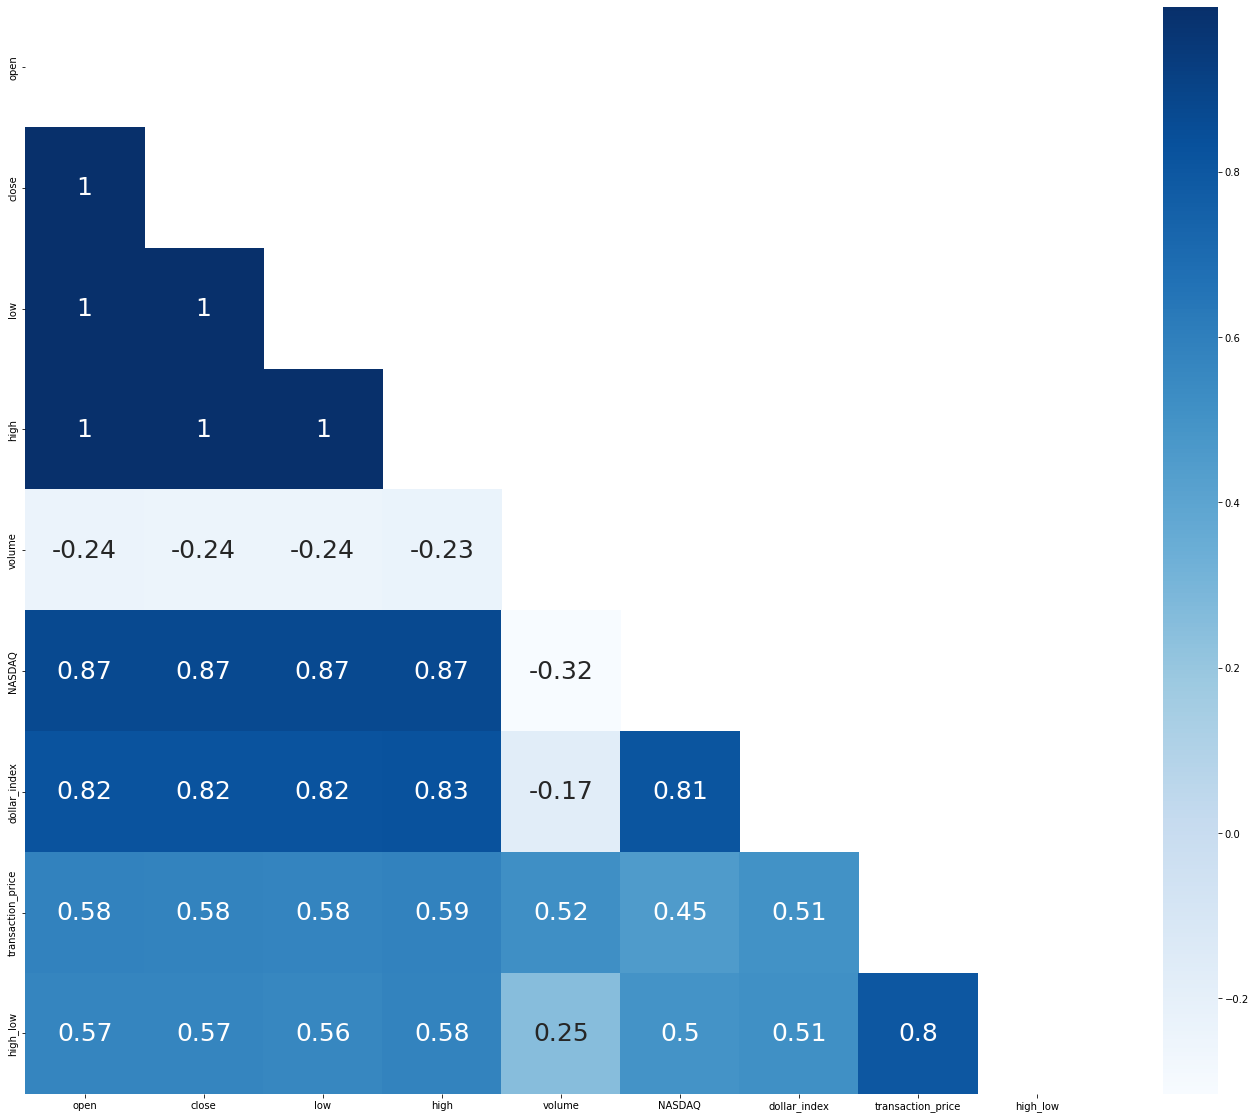

In [50]:
#correlation for numeric values
corr_matrix = amazon_df.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(24, 20))
sns.heatmap(corr_matrix,cmap="Blues", mask = mask, annot = True, annot_kws={"size":25})
plt.show()

# function for plotting 

In [51]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error 

In [52]:
def plotPrediction(pred, target) :
  fig = plt.figure(figsize=(15,8))
  p = pd.Series(pred, index = test_target.index)

  plt.plot(p)
  plt.plot(target)

  plt.legend(['pred','target'])
  plt.title("Prediction vs reality", size=20, weight='bold')

  mse=np.round(mean_squared_error(target,pred),2)
  mae=np.round(mean_absolute_error(target, pred),2)
  
  print('Mean Squared error : {}'.format(mse))
  print('Mean Absolute error : {}'.format(mae))

In [53]:
def plotAll (train_target, pred, test_target) :
  try:
    fig = plt.figure(figsize=(15,8))
    p = pd.Series(pred, index = test_target.index)

    plt.plot(train_target)
    plt.plot(p, ls = '--', color = 'black')
    plt.plot(test_target, color = 'orange')

    plt.legend(['train_target','pred','target'])
    plt.title("Amazon stock price ", size=20, weight='bold')
  except Exception:
    pass

In [54]:
# function for LSTM or where prediction and target size is different
def plotPred(pred, target) :
  try:
    fig = plt.figure(figsize=(15,8))
    p = pd.Series(pred, index = test_target.index[:pred.size])

    plt.plot(p)
    plt.plot(target)

    plt.legend(['pred','target'])
    plt.title("Prediction vs reality", size=20, weight='bold')

    mse=np.round(mean_squared_error(target,pred),2)
    mae=np.round(mean_absolute_error(target, pred),2)
    
    print('Mean Squared error : {}'.format(mse))
    print('Mean Absolute error : {}'.format(mae))
  except Exception : pass

In [55]:
# function for LSTM or where prediction and target size is different
def plotStart(train_target, pred, test_target) :
  try:
    fig = plt.figure(figsize=(15,8))
    p = pd.Series(pred, index = test_target.index[:pred.size])

    plt.plot(train_target)
    plt.plot(p, ls = '--', color = 'black')
    plt.plot(test_target, color = 'orange')

    plt.legend(['train_target','pred','target'])
    plt.title("Amazon stock price ", size=20, weight='bold')
  except Exception:
    pass

# Model
Linear Regression, ARIMA, FBprophet, LSTM

In [56]:
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Dense, LSTM, BatchNormalization, Dropout
from keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from statsmodels.tsa.arima_model import ARIMA
from fbprophet import Prophet

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Linear Regression

In [57]:
lr = LinearRegression()
lr.fit(mm_scaled_train_pd.drop(['transaction_price'], axis = 1).to_numpy(), train_target)
pred = lr.predict(mm_scaled_test_pd.drop(['transaction_price'], axis = 1).to_numpy())

Mean Squared error : 16.14
Mean Absolute error : 3.09
score for the linear Regression model :  0.9983686638461821


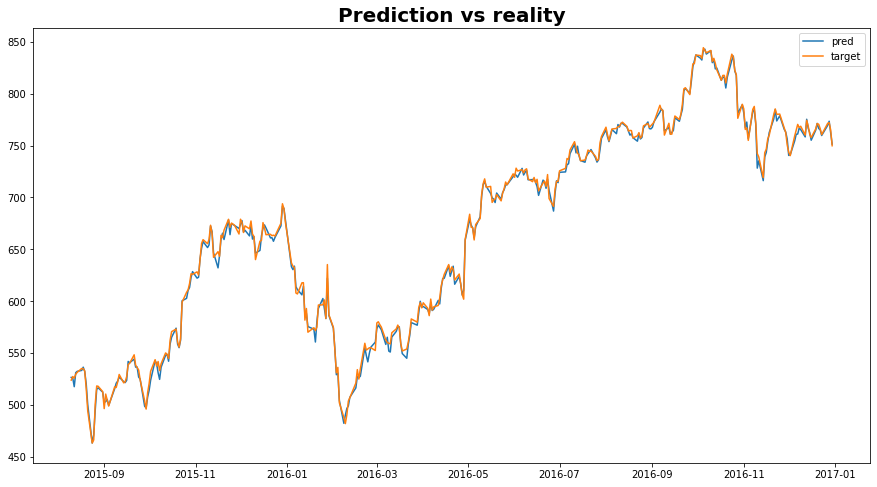

In [58]:
plotPrediction(pred,test_target)
print("score for the linear Regression model : " , r2_score(test_target, pred))
# the R2 score is very high since the data is overfitted and it the input features have a high correlation with the target value(ex. open and close)

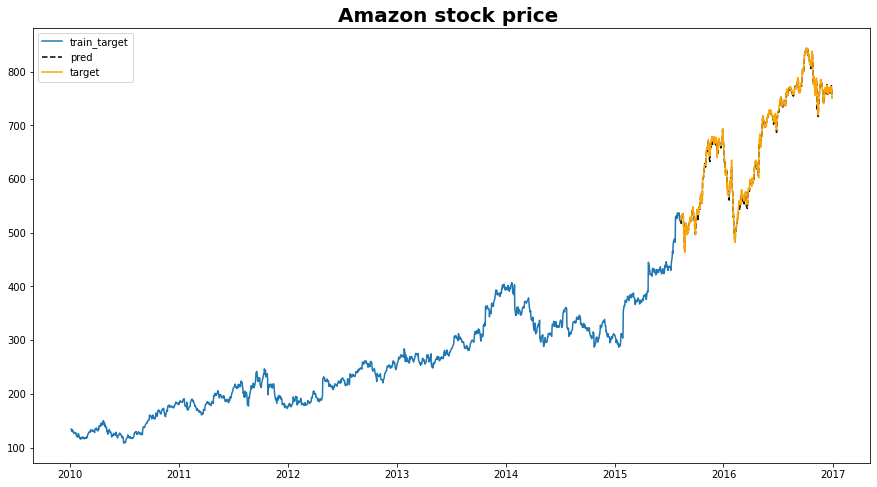

In [59]:
plotAll(train_target, pred, test_target)

## ARIMA

In [60]:
import statsmodels.tsa.api as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf

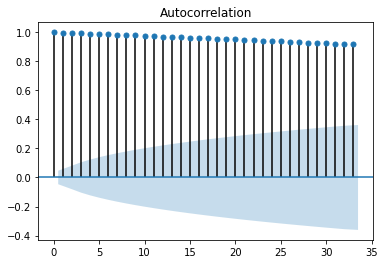

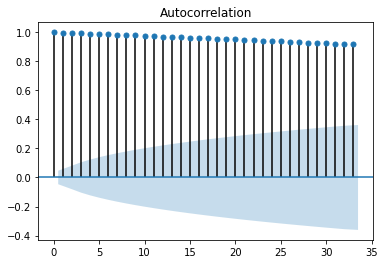

In [61]:
plot_acf(amazon_df.close)

In [62]:
result = adfuller(amazon_df.close)
print('0 p-value : ', result[1])

result = adfuller(amazon_df.close.diff().dropna())
print('1 p-value : ', result[1])
# "d = 1"
result = adfuller(amazon_df.close.diff().diff().dropna())
print('2 p-value : ', result[1])

0 p-value :  0.9847240515419754
1 p-value :  0.0
2 p-value :  1.0343179433136245e-28


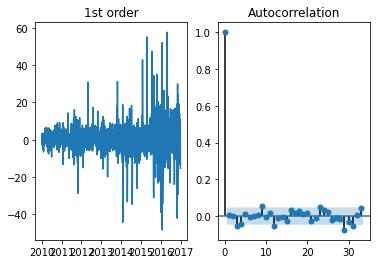

In [63]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st order')
ax1.plot(amazon_df.close.diff())
ax2 = f.add_subplot(122)
plot_acf(amazon_df.close.diff().dropna(), ax=ax2)
plt.show()
# q = 1

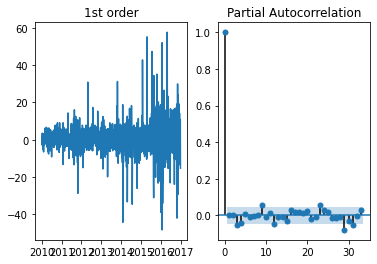

In [64]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st order')
ax1.plot(amazon_df.close.diff())
ax2 = f.add_subplot(122)
plot_pacf(amazon_df.close.diff().dropna(), ax=ax2)
plt.show()
# p = 1

In [65]:
arima = ARIMA(amazon_df.close, order = (1,1,1))
arima = arima.fit()
print(arima.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                 1761
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5978.208
Method:                       css-mle   S.D. of innovations              7.213
Date:                Fri, 20 May 2022   AIC                          11964.417
Time:                        00:42:18   BIC                          11986.311
Sample:                             1   HQIC                         11972.508
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3508      0.160      2.198      0.028       0.038       0.664
ar.L1.D.close     0.7908      0.192      4.109      0.000       0.414       1.168
ma.L1.D.close    -0.8058      0.186     

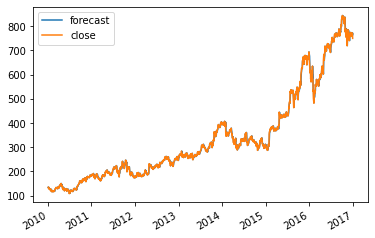

In [66]:
arima.plot_predict(dynamic=False)
plt.show()

In [67]:
train_ar = train_target.copy()
test_ar = test_target.copy()

Mean Squared error : 26181.05
Mean Absolute error : 145.33
score for the ARIMA model :  0.7608162693444726


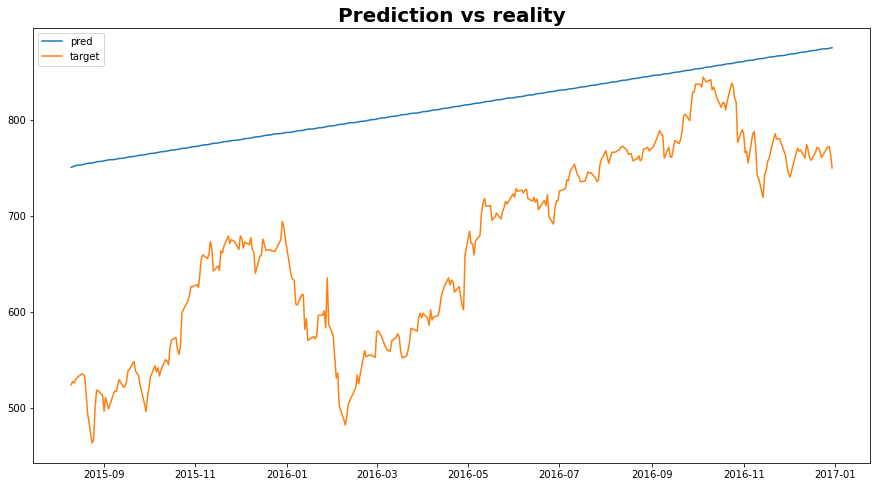

In [68]:
fc, se, conf = arima.forecast(353, alpha = 0.05)

fc_ser = pd.Series(fc, index= test_ar.index)

mape = np.mean(np.abs(fc - test_ar)/np.abs(test_ar))  # MAPE

plotPrediction(fc_ser, test_ar)
# R2 score has no meaning since we used an arima model(differenced)

print("score for the ARIMA model : " , 1- mape)

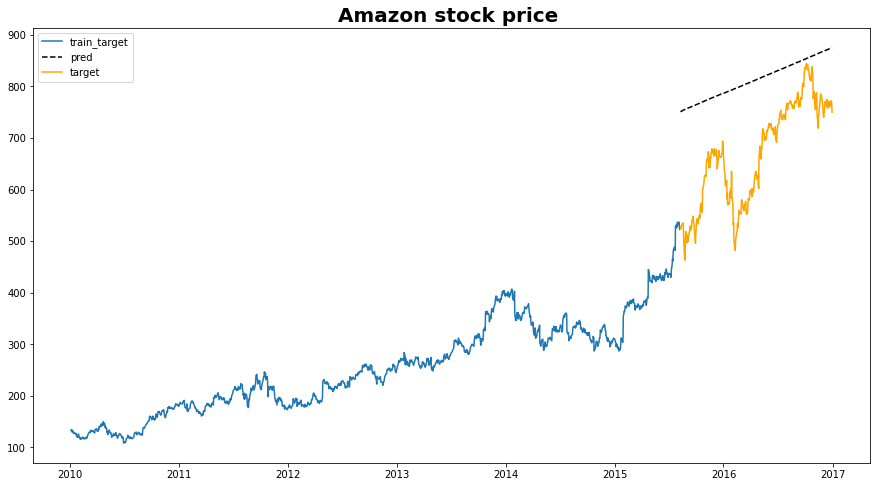

In [69]:
plotAll(train_ar,fc_ser, test_ar)

## FBprophet

In [70]:
from fbprophet import Prophet

In [71]:
train_p = train_target.copy().to_frame()
test_p = test_target.copy().to_frame()

train_p.reset_index(inplace = True)
test_p.reset_index(inplace = True)

train_p.columns = ['ds', 'y']
test_p.columns = ['ds', 'y']

train_p.head()

,ds,y
0,2010-01-04,133.899994
1,2010-01-05,134.690002
2,2010-01-06,132.250000
3,2010-01-07,130.000000
4,2010-01-08,133.520004


In [72]:
model = Prophet()
model.fit(train_p)
pred = model.predict(test_p)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [73]:
test_pred=pd.DataFrame(columns=['ds','test','predict','pred_lower','pred_high'], index=test_p.index)
test_pred['test']=test_p['y']
test_pred['ds']=test_p['ds']
test_pred['predict']=pred['yhat']
test_pred['pred_lower']=pred['yhat_lower']
test_pred['pred_high']=pred['yhat_upper']

Mean Squared error : 18969.22
Mean Absolute error : 125.81
score for the ARIMA model :  0.8188846839574327


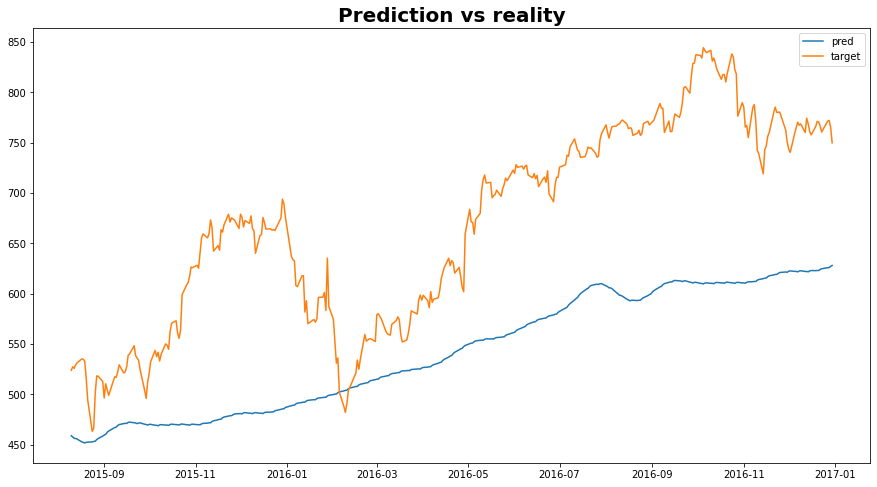

In [74]:
#plotting Test vs Predicted
test_pred['predict'].index = test_target.index
plotPrediction(test_pred['predict'], test_target)
mape = np.mean(np.abs(test_pred['predict'] - test_target)/np.abs(test_target))  # MAPE
print("score for the ARIMA model : " , 1- mape)

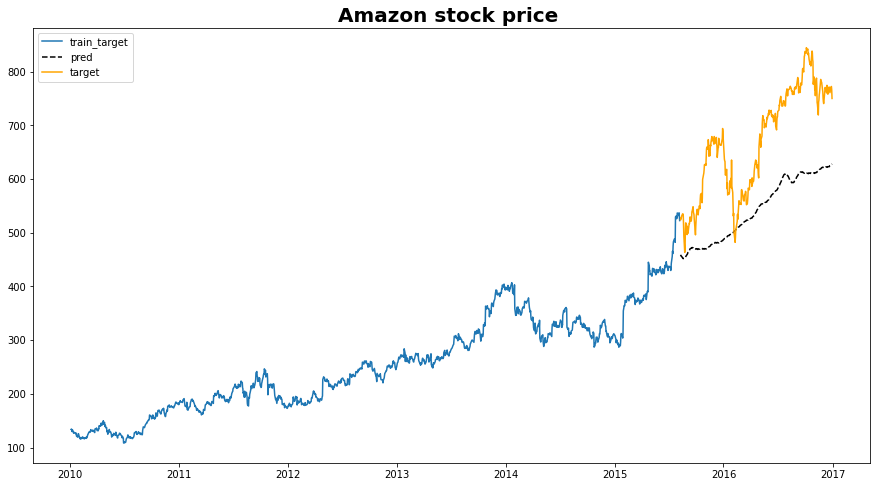

In [75]:
plotAll(train_target,test_pred['predict'], test_target)

## LSTM

In [76]:
train_size = train_target.size 
training_set = amazon_df.iloc[:train_size, 3:4].values
test_set = amazon_df.iloc[train_size:, 3:4].values
# use high

# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled=sc.transform(test_set)

time_step = 30

# making train dataset
X_train = []
y_train = []
for i in range(time_step, train_size):

   X_train.append(training_set_scaled[i - time_step:i, 0])

   y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1379, 30, 1)

In [77]:
test_size = test_target.size 
X_test = []
y_test = []

for i in range(time_step, test_size):
    X_test.append(test_set_scaled[i-time_step :i, 0])
    y_test.append(test_set_scaled[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(323, 30, 1)

In [78]:
# making model
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#earlystopping 
earlystopping = EarlyStopping(monitor='val_loss', patience=8)

# Fitting the RNN to the Training set
model.fit(X_train, y_train, validation_data = (X_test, y_test), callbacks = earlystopping, epochs = 100, batch_size = 32)

Epoch 1/100
44/44 [==============================] - 16s 43ms/step - loss: 0.0181 - val_loss: 0.0216
Epoch 2/100
44/44 [==============================] - 1s 12ms/step - loss: 0.0035 - val_loss: 0.0264
Epoch 3/100
44/44 [==============================] - 1s 12ms/step - loss: 0.0029 - val_loss: 0.0207
Epoch 4/100
44/44 [==============================] - 1s 12ms/step - loss: 0.0025 - val_loss: 0.0070
Epoch 5/100
44/44 [==============================] - 1s 12ms/step - loss: 0.0030 - val_loss: 0.0237
Epoch 6/100
44/44 [==============================] - 1s 12ms/step - loss: 0.0040 - val_loss: 0.0151
Epoch 7/100
44/44 [==============================] - 1s 12ms/step - loss: 0.0025 - val_loss: 0.0062
Epoch 8/100
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - val_loss: 0.0046
Epoch 9/100
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - val_loss: 0.0043
Epoch 10/100
44/44 [==============================] - 1s 12ms/step - loss: 0.0020 - val_loss: 0.004

In [79]:
test_size = test_target.size 
dataset_train = amazon_df.iloc[:train_size, 1:2]
dataset_test = amazon_df.iloc[train_size:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - time_step:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []

for i in range(time_step, test_size):
   X_test.append(inputs[i-time_step:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


(323, 30, 1)


In [80]:
print(predicted_stock_price.shape)
print(test_target.shape)

(323, 1)
(353,)


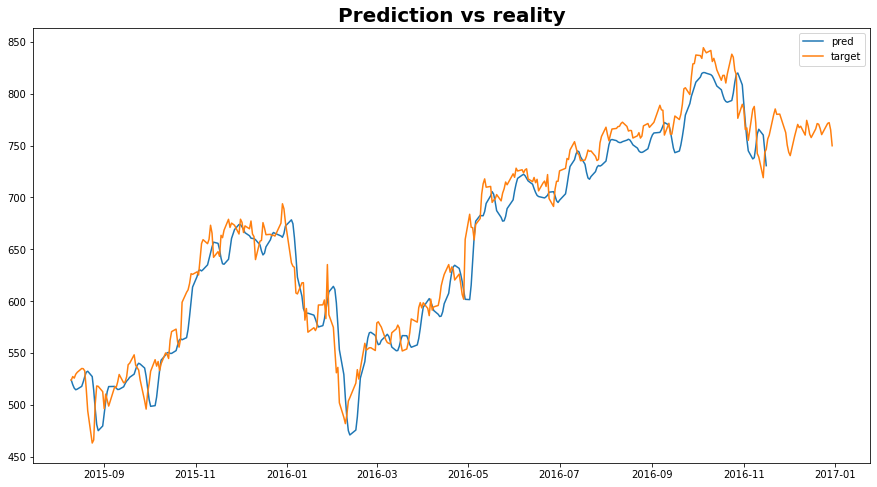

In [81]:
predicted_stock_price = predicted_stock_price.flatten()
plotPred(predicted_stock_price, test_target)

R2 accuracy for LSTM model : 0.95


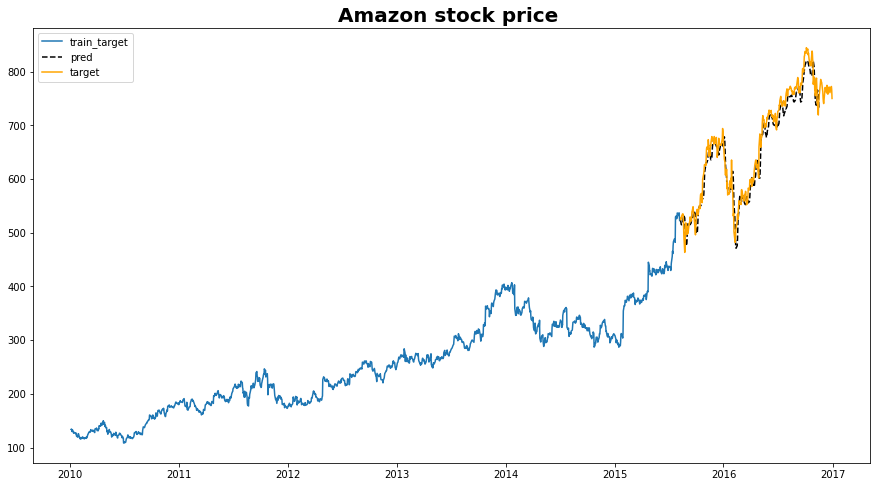

In [82]:
plotStart(train_target, predicted_stock_price, test_target)
# accuracy = model.evaluate(X_test, test_target[ : X_test.size])

pred_target = test_target[:323]
r2 = np.round(r2_score(pred_target ,predicted_stock_price),2)
print("R2 accuracy for LSTM model : {}".format(r2))

## Conclusion

**LSTM model** is the most accurate model for predicting stock prices

# Application

1. input a stock code
2. web crawl the data for the stock.(use recent 3 yrs of data)
3. The data pipeline will preprocess(imputation, scaling etc.) the data so it can be fed into LSTM model.
4. train and evaluate a LSTM model 
5. predict the future using the model.

## 1. **input** a stock code(ticker)

In [1]:
! pip install yfinance
! pip install pandas_datareader
! pip install get-all-tickers

     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 9.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
  Created wheel for get-all-tickers: filename=get_all_tickers-1.8-py3-none-any.whl size=4248 sha256=aaafaebb5fe8808f32036cc17f3a59d19fe62bbccdad07ea06ffcf2b50133291
  Stored in directory: /root/.cache/pip/wheels/f0/

In [2]:
from get_all_tickers import get_tickers as gt

In [3]:
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import datetime

In [4]:
def inputTick() :
  ticker = input("input the STOCKCODE in Yahoo Finance form(ex. 'AAPL') : ").strip().split("'")[1].upper()
  return ticker

In [5]:
ticker = inputTick()

input the STOCKCODE in Yahoo Finance form(ex. 'AAPL') : 'GOOGL'


In [6]:
print(ticker)

GOOGL


## 2. get the data for the stock through **web crawling**

In [7]:
def checkTicker(tick) :
  data = yf.Ticker(tick)
  data = data.history(period=('6y'))
  if data.size == 0 :
    print('Invalid ticker')
    ticker = inputTick()
    checkTicker(ticker)
  else : 
    data.info()
    return data

In [8]:
data = checkTicker(ticker)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2016-05-20 to 2022-05-19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1511 non-null   float64
 1   High          1511 non-null   float64
 2   Low           1511 non-null   float64
 3   Close         1511 non-null   float64
 4   Volume        1511 non-null   int64  
 5   Dividends     1511 non-null   int64  
 6   Stock Splits  1511 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 94.4 KB


In [9]:
data['Transaction_Price']=((data['Open']+data['Close'])/2)*data['Volume']
data['High_low'] = (data['High'] - data['Low'])
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Transaction_Price,High_low
Date,,,,,,,,,
2016-05-20,716.460022,727.700012,715.010010,721.710022,1739900,0,0,1.251136e+09,12.690002
2016-05-23,719.979980,723.500000,716.940002,717.250000,1240800,0,0,8.916575e+08,6.559998
2016-05-24,719.849976,734.200012,719.650024,733.030029,1894200,0,0,1.376023e+09,14.549988
2016-05-25,735.000000,739.890015,732.599976,738.099976,1610800,0,0,1.186435e+09,7.290039
2016-05-26,736.000000,741.099976,733.000000,736.929993,1360100,0,0,1.001666e+09,8.099976
...,...,...,...,...,...,...,...,...,...
2022-05-13,2290.659912,2357.500000,2272.100098,2321.010010,1747900,0,0,4.030369e+09,85.399902
2022-05-16,2299.110107,2323.399902,2277.790039,2288.899902,1299500,0,0,2.981060e+09,45.609863
2022-05-17,2336.810059,2338.000000,2297.399902,2329.459961,1152700,0,0,2.689405e+09,40.600098


## 3. **Preprocess** data
data pipeline preprocess the data so it can be fed into LSTM model

In [10]:
used_feats = ['Open', 'High', 'Close', 'Low', 'Volume', 'Transaction_Price', 'High_low']
input_feats = ['Open', 'High', 'Low', 'Volume', 'Transaction_Price', 'High_low']
df = data[used_feats].copy()
df

,Open,High,Close,Low,Volume,Transaction_Price,High_low
Date,,,,,,,
2016-05-20,716.460022,727.700012,721.710022,715.010010,1739900,1.251136e+09,12.690002
2016-05-23,719.979980,723.500000,717.250000,716.940002,1240800,8.916575e+08,6.559998
2016-05-24,719.849976,734.200012,733.030029,719.650024,1894200,1.376023e+09,14.549988
2016-05-25,735.000000,739.890015,738.099976,732.599976,1610800,1.186435e+09,7.290039
2016-05-26,736.000000,741.099976,736.929993,733.000000,1360100,1.001666e+09,8.099976
...,...,...,...,...,...,...,...
2022-05-13,2290.659912,2357.500000,2321.010010,2272.100098,1747900,4.030369e+09,85.399902
2022-05-16,2299.110107,2323.399902,2288.899902,2277.790039,1299500,2.981060e+09,45.609863
2022-05-17,2336.810059,2338.000000,2329.459961,2297.399902,1152700,2.689405e+09,40.600098


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_pd = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_pd, columns = used_feats)

In [12]:
scaled_df

,Open,High,Close,Low,Volume,Transaction_Price,High_low
0,0.014502,0.018900,0.017520,0.018371,0.205755,0.042983,0.050400
1,0.016004,0.017111,0.015594,0.019208,0.125168,0.022961,0.016598
2,0.015949,0.021669,0.022409,0.020383,0.230669,0.049939,0.060656
3,0.022416,0.024093,0.024598,0.026001,0.184909,0.039379,0.020623
4,0.022843,0.024608,0.024093,0.026174,0.144430,0.029088,0.025090
...,...,...,...,...,...,...,...
1506,0.686516,0.713141,0.708174,0.693804,0.207046,0.197777,0.451337
1507,0.690123,0.698616,0.694308,0.696272,0.134646,0.139334,0.231927
1508,0.706217,0.704835,0.711824,0.704778,0.110942,0.123090,0.204302
1509,0.690503,0.692056,0.672322,0.676023,0.208403,0.195252,0.404411


In [13]:
price = df['Close'].values.reshape(-1,1)
price_sc = MinMaxScaler()
price_sc = scaler.fit_transform(price)

In [14]:
price_sc

array([[0.01752007],
       [0.01559402],
       [0.02240859],
       ...,
       [0.71182354],
       [0.67232242],
       [0.65923309]])

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    scaled_df.drop('Close',axis=1), scaled_df['Close'], test_size=0.2, random_state=0, shuffle=False)

In [16]:
train_size = y_train.size
test_size = y_test.size

In [17]:
print(x_train.shape)
print(y_train.shape)

(1208, 6)
(1208,)


In [18]:
x_test.shape, y_test.shape

((303, 6), (303,))

In [19]:
df

,Open,High,Close,Low,Volume,Transaction_Price,High_low
Date,,,,,,,
2016-05-20,716.460022,727.700012,721.710022,715.010010,1739900,1.251136e+09,12.690002
2016-05-23,719.979980,723.500000,717.250000,716.940002,1240800,8.916575e+08,6.559998
2016-05-24,719.849976,734.200012,733.030029,719.650024,1894200,1.376023e+09,14.549988
2016-05-25,735.000000,739.890015,738.099976,732.599976,1610800,1.186435e+09,7.290039
2016-05-26,736.000000,741.099976,736.929993,733.000000,1360100,1.001666e+09,8.099976
...,...,...,...,...,...,...,...
2022-05-13,2290.659912,2357.500000,2321.010010,2272.100098,1747900,4.030369e+09,85.399902
2022-05-16,2299.110107,2323.399902,2288.899902,2277.790039,1299500,2.981060e+09,45.609863
2022-05-17,2336.810059,2338.000000,2329.459961,2297.399902,1152700,2.689405e+09,40.600098


In [20]:
# save target close as variable
test_target = df.iloc[train_size:, 2:3]
train_target = df.iloc[:train_size, 2:3]

## 4. **LSTM model** gives the prediction

In [21]:
import tensorflow as tf
import os
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [22]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [23]:
WINDOW_SIZE=5
BATCH_SIZE=32

In [24]:
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [25]:
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'X shape(batch_size, window_size, features) : {data[0].shape}')
    print(f'Y shape(batch_size, window_size, features): {data[1].shape}')

X shape(batch_size, window_size, features) : (32, 5, 1)
Y shape(batch_size, window_size, features): (32, 1)


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
# from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda, Dropout
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [42]:
# making model
model = Sequential()

# 1-dimensional feature map 
model.add(Conv1D(filters=32, kernel_size=5, padding="causal", activation="relu", input_shape=[WINDOW_SIZE, 1]))

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (WINDOW_SIZE, 32)))
model.add(Dropout(0.3))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.3))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.3))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.3))

model.add(Dense(16, activation="relu"))

# Adding the output layer
model.add(Dense(units = 1))

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 5, 32)             192       
                                                                 
 lstm_4 (LSTM)               (None, 5, 50)             16600     
                                                                 
 dropout_4 (Dropout)         (None, 5, 50)             0         
                                                                 
 lstm_5 (LSTM)               (None, 5, 50)             20200     
                                                                 
 dropout_5 (Dropout)         (None, 5, 50)             0         
                                                                 
 lstm_6 (LSTM)               (None, 5, 50)             20200     
                                                                 
 dropout_6 (Dropout)         (None, 5, 50)            

In [45]:
# loss and optimizer

loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [46]:
# earlystopping
earlystopping = EarlyStopping(monitor='val_loss', patience=8)

# check point for best val_loss
filename = os.path.join('tmp', 'checkpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [47]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=100, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/100
     38/Unknown - 9s 17ms/step - loss: 0.0148 - mse: 0.0296
Epoch 1: val_loss improved from inf to 0.15849, saving model to tmp/checkpointer.ckpt
38/38 [==============================] - 11s 72ms/step - loss: 0.0148 - mse: 0.0296 - val_loss: 0.1585 - val_mse: 0.3170
Epoch 2/100
37/38 [============================>.] - ETA: 0s - loss: 0.0053 - mse: 0.0106
Epoch 2: val_loss improved from 0.15849 to 0.03074, saving model to tmp/checkpointer.ckpt
38/38 [==============================] - 1s 21ms/step - loss: 0.0052 - mse: 0.0105 - val_loss: 0.0307 - val_mse: 0.0615
Epoch 3/100
38/38 [==============================] - ETA: 0s - loss: 8.9215e-04 - mse: 0.0018
Epoch 3: val_loss improved from 0.03074 to 0.00080, saving model to tmp/checkpointer.ckpt
38/38 [==============================] - 1s 21ms/step - loss: 8.9215e-04 - mse: 0.0018 - val_loss: 8.0297e-04 - val_mse: 0.0016
Epoch 4/100
36/38 [===========================>..] - ETA: 0s - loss: 6.4902e-04 - mse: 0.0013
Epoch 4: val_lo

In [48]:
model.load_weights(filename)

In [49]:
def descale_mm(scaled_val,max, min) :
  return scaled_val * (max-min) + min

In [50]:
pred = model.predict(test_data)
maxClosed = price.max()
minClosed = price.min()
pred = descale_mm(pred, maxClosed, minClosed)

In [51]:
pred.shape

(298, 1)

In [52]:
price_sc.shape

(1511, 1)

### plot function

In [53]:
# function for LSTM or where prediction and target size is different
def plotPred(pred, target) :
  try:
    fig = plt.figure(figsize=(15,8))
    p = pd.Series(pred, index = target.index[:pred.size])
    
    plt.plot(p)
    plt.plot(target)

    plt.legend(['pred','target'])
    plt.title("Prediction vs reality", size=20, weight='bold')

    mse=np.round(mean_squared_error(target,pred),2)
    mae=np.round(mean_absolute_error(target, pred),2)
    
    print('Mean Squared error : {}'.format(mse))
    print('Mean Absolute error : {}'.format(mae))
  except Exception : pass

In [54]:
# function for LSTM or where prediction and target size is different
def plotStart(train_target, pred, test_target) :
  try:
    fig = plt.figure(figsize=(15,8))
    p = pd.Series(pred, index = test_target.index[:pred.size])

    plt.plot(train_target)
    plt.plot(p, ls = '--', color = 'black')
    plt.plot(test_target, color = 'orange')

    plt.legend(['train_target','pred','target'])
    plt.title(ticker+" Price", size=20, weight='bold')
  except Exception:
    pass

### show graph

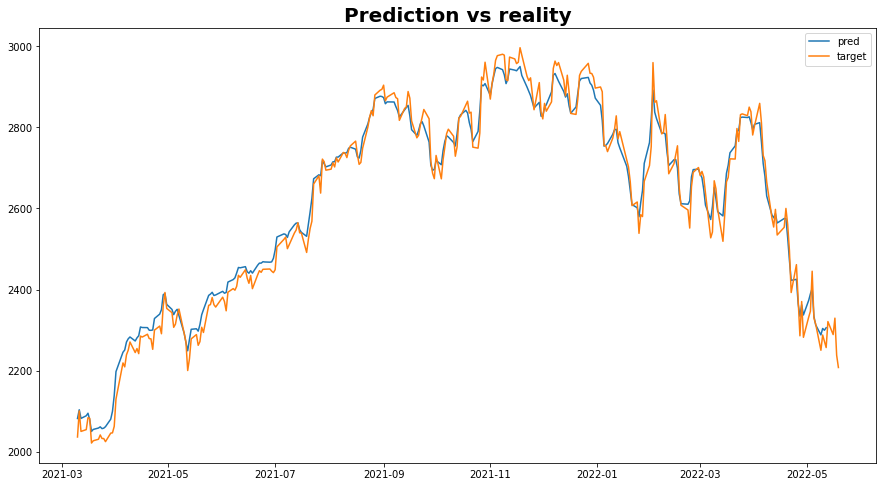

In [55]:
pred = pred.flatten()
plotPred(pred, test_target)

R2 accuracy for LSTM model : 0.9


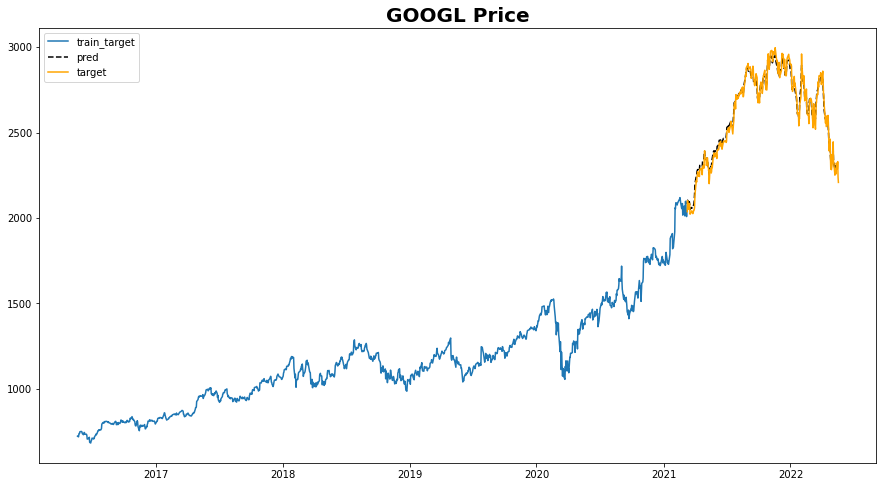

In [56]:
plotStart(train_target, pred, test_target)

r2 = np.round(r2_score(test_target[WINDOW_SIZE:] ,pred),2)
print("R2 accuracy for LSTM model : {}".format(r2))

## 5. predict **future** price

In [57]:
from pandas.tseries.offsets import BDay
from pandas.tseries.offsets import *
from datetime import timedelta

In [58]:
def predict(days, model):
    pred_list = scaled_df['Close'][ -WINDOW_SIZE :].to_numpy()
    
    for i in range(days):
        x_new = pred_list[-WINDOW_SIZE:]
        x_new = x_new.reshape((1, WINDOW_SIZE, 1))
        out = model.predict(x_new)[0][0]
        pred_list = np.append(pred_list, out)

    pred_list = pred_list[WINDOW_SIZE - 1:]

    return pred_list

In [59]:
def pred_dates(days):
  last_date = df.index.values[-1]
  last_date_ts = pd.Timestamp(last_date)
  end_date = last_date_ts + BDay(days)
  pred_dates_ts = pd.bdate_range(last_date +1, end_date).tolist()
  pred_dates = pd.Series(np.array(pred_dates_ts)).to_frame()

  return pred_dates.values

In [60]:
pred_dates(10)

array([['2022-05-19T00:00:00.000000000'],
       ['2022-05-20T00:00:00.000000000'],
       ['2022-05-23T00:00:00.000000000'],
       ['2022-05-24T00:00:00.000000000'],
       ['2022-05-25T00:00:00.000000000'],
       ['2022-05-26T00:00:00.000000000'],
       ['2022-05-27T00:00:00.000000000'],
       ['2022-05-30T00:00:00.000000000'],
       ['2022-05-31T00:00:00.000000000'],
       ['2022-06-01T00:00:00.000000000'],
       ['2022-06-02T00:00:00.000000000']], dtype='datetime64[ns]')

In [61]:
# show prediction of next 10 days
days = 10

forecast = predict(days, model)

maxClosed = price.max()
minClosed = price.min()
forecast = descale_mm(forecast, maxClosed, minClosed)

# forecast_dates = pred_dates(days)

In [62]:
forecast.size

11

In [63]:
forecast_pd = pd.Series(forecast, index= pred_dates(days))

In [64]:
print(forecast)

[2207.67993164 2329.66737031 2311.40080851 2309.81106761 2271.390489
 2285.70602433 2340.24719397 2326.75523773 2320.56645564 2311.77070828
 2331.2768484 ]


In [65]:
# function for LSTM to plot future data
def plotPred(pred) :
  try:
    fig = plt.figure(figsize=(15,8))
    p = pd.Series(pred)
    
    plt.plot(p)

    plt.legend(['pred'])
    plt.title(f"Price predicted for {ticker} for {days} days ", size=20, weight='bold')

  except Exception : pass

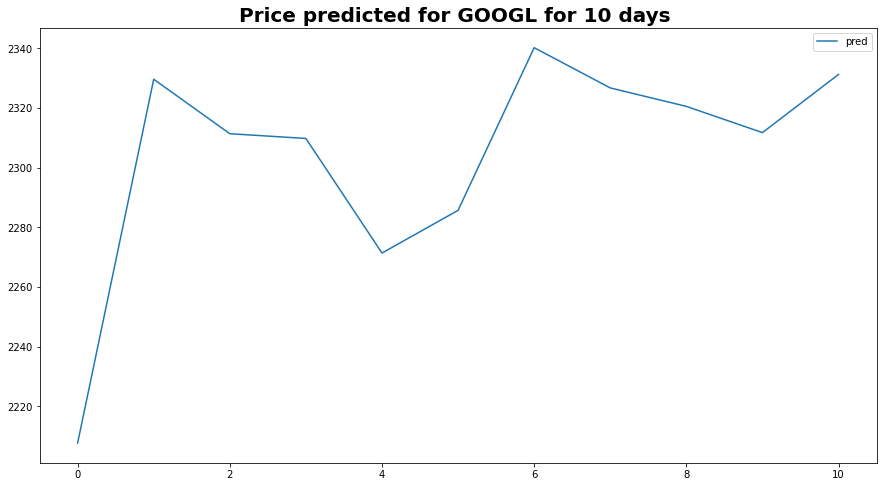

In [66]:
plotPred(forecast)

In [67]:
def plotFuture(history, pred) :
  try:
    fig = plt.figure(figsize=(15,8))

    plt.plot(history, color = 'black')
    plt.plot(pred, color = 'red')
    plt.legend(['train_target','pred','target'])
    plt.title(f"Stock price prediction for {ticker}", size=20, weight='bold')
  except Exception : pass

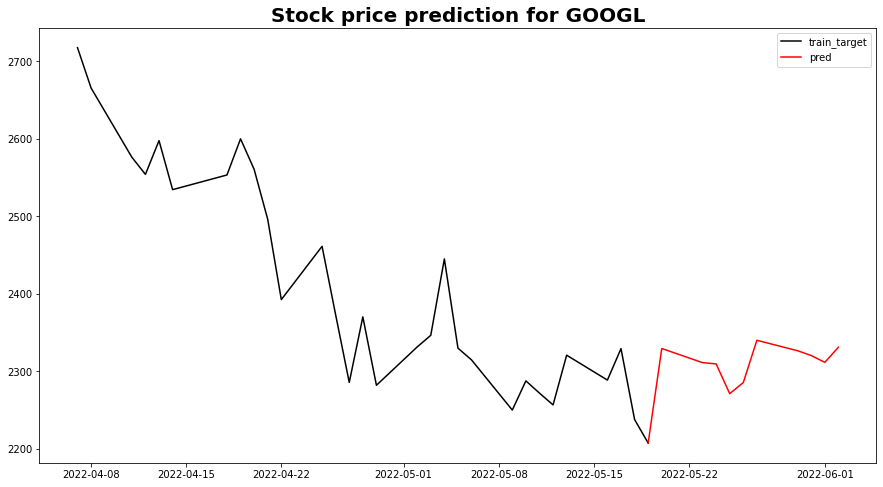

In [68]:
recent = 30
plotFuture(test_target[-recent:], forecast_pd)